In [1]:
import numpy as np
from search import DStarSearcher
from skimage.io import imshow


In [2]:

grid_size = (8,8);
grid = np.random.rand(*grid_size);
grid = np.vectorize(lambda x: 1 if x > 0.8 else 0)(grid);

c:/Users/Harrison Truscott/AppData/Local/Programs/Python/Python310/lib/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


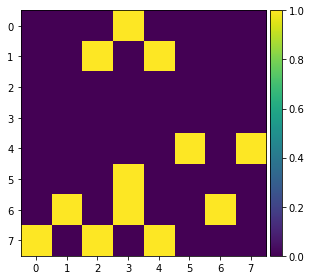

In [3]:
imshow(grid)

In [4]:
def dist(p1,p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

offsets = [(0,1),(1,0),(0,-1),(-1,0),(1,1),(-1,1),(1,-1),(-1,-1)];

def in_bounds(p):
    return all([p[i] >= 0 and p[i] < grid.shape[i] for i in range(len(grid.shape))])

def neigh(p):
    for o in offsets:
        t = (p[0]+o[0],p[1]+o[1])
        if in_bounds(t):
            yield t,float('inf') if (grid[t] or grid[p]) else 1


In [5]:
searcher = DStarSearcher(dist,(0,0),(7,7),neigh,neigh);

In [6]:
searcher.computeShortestPath();

(7, 7)
(6, 7)
(5, 6)
(5, 5)
(4, 4)
(3, 3)
(2, 2)
(1, 1)
start reached -- clause 1
g,rhs: inf inf
g,rhs: inf 8
g,rhs: inf 8
(0, 0)
8 8


In [15]:
import copy


p = searcher.return_shortest_path(start=(0,0));
display_grid = copy.copy(grid);
for po in p:
    display_grid[po] = 2;
# display_grid[np.array(p)] = 2;

8 8


In [8]:
print(searcher.g[(0,1)]);

inf


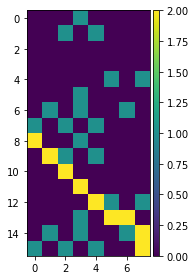

In [17]:
imshow(np.vstack((grid,display_grid)));